In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import sqlite3 as sql
import os
import pandas as pd
from datetime import datetime
from glob import glob
import sklearn as sk
import sklearn.linear_model

os.sys.path.append('../')
import PlaceCellAnalysis as pc
import utilities as u
import preprocessing as pp
import behavior as b
import BayesianDecoding as bd


%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
# load session
mouse = '4139224.3'
df = pp.load_session_db()


#df = df[df['RewardCount']>30]
df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime','SessionNumber'])

df_mouse = df[df['MouseName'].str.match(mouse)]
df_mouse = df_mouse[df_mouse['Track'].str.match('TwoTower_noTimeout') | df_mouse['Track'].str.match('TwoTower_Timeout')]
df_mouse

,MouseName,DateFolder,SessionNumber,Track,RewardCount,Imaging,ImagingRegion,DateTime,data file,scanfile,scanmat
823,4139224.3,18_10_2018,1,TwoTower_noTimeout,61,1,CA1,2018-10-18,G:\My Drive\\VR_Data\TwoTower\4139224.3\18_10_...,G:\My Drive\2P_Data\TwoTower\4139224.3\18_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\18_10_2...
825,4139224.3,18_10_2018,3,TwoTower_noTimeout,41,1,CA1,2018-10-18,G:\My Drive\\VR_Data\TwoTower\4139224.3\18_10_...,G:\My Drive\2P_Data\TwoTower\4139224.3\18_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\18_10_2...
859,4139224.3,20_10_2018,2,TwoTower_noTimeout,60,1,CA1,2018-10-20,G:\My Drive\\VR_Data\TwoTower\4139224.3\20_10_...,G:\My Drive\2P_Data\TwoTower\4139224.3\20_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\20_10_2...
897,4139224.3,23_10_2018,1,TwoTower_Timeout,48,1,CA1,2018-10-23,G:\My Drive\\VR_Data\TwoTower\4139224.3\23_10_...,G:\My Drive\2P_Data\TwoTower\4139224.3\23_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\23_10_2...
927,4139224.3,25_10_2018,1,TwoTower_Timeout,69,1,,2018-10-25,G:\My Drive\\VR_Data\TwoTower\4139224.3\25_10_...,G:\My Drive\2P_Data\TwoTower\4139224.3\25_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\25_10_2...
951,4139224.3,26_10_2018,3,TwoTower_Timeout,72,1,CA1,2018-10-26,G:\My Drive\\VR_Data\TwoTower\4139224.3\26_10_...,G:\My Drive\2P_Data\TwoTower\4139224.3\26_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\26_10_2...
967,4139224.3,27_10_2018,4,TwoTower_Timeout,67,1,CA1,2018-10-27,G:\My Drive\\VR_Data\TwoTower\4139224.3\27_10_...,G:\My Drive\2P_Data\TwoTower\4139224.3\27_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\27_10_2...
977,4139224.3,29_10_2018,1,TwoTower_Timeout,71,1,CA1,2018-10-29,G:\My Drive\\VR_Data\TwoTower\4139224.3\29_10_...,G:\My Drive\2P_Data\TwoTower\4139224.3\29_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\29_10_2...
988,4139224.3,30_10_2018,1,TwoTower_Timeout,78,1,CA1,2018-10-30,G:\My Drive\\VR_Data\TwoTower\4139224.3\30_10_...,G:\My Drive\2P_Data\TwoTower\4139224.3\30_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\30_10_2...
1001,4139224.3,31_10_2018,2,TwoTower_Timeout,66,1,CA1,2018-10-31,G:\My Drive\\VR_Data\TwoTower\4139224.3\31_10_...,G:\My Drive\2P_Data\TwoTower\4139224.3\31_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\31_10_2...


In [52]:
sess=df_mouse.iloc[2]

In [155]:
VRDat,C,Cd, S, A = pp.load_scan_sess(df_mouse.iloc[6])
trial_info, tstart_inds, teleport_inds = u.by_trial_info(VRDat)
C_trial_mat, occ_trial_mat, edges,centers = u.make_pos_bin_trial_matrices(C,VRDat['pos']._values,VRDat['tstart']._values,VRDat['teleport']._values)

G:\My Drive\2P_Data\TwoTower\4139224.3\27_10_2018\TwoTower_Timeout\TwoTower_Timeout_004_014.mat


C:\Users\mplitt\MightyMorphingPhotonRangers\preprocessing.py:199: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  frame['ca inds'] = caInds
C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcas

G:\My Drive\2P_Data\TwoTower\4139224.3\27_10_2018\TwoTower_Timeout\TwoTower_Timeout_004_014.mat
#subsystem#not made into numpy array
Anot made into numpy array
frame diff 0


C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:203: RuntimeWarning: Mean of empty slice
  zone1_speed[i] = np.nanmean(sub_frame.loc[zone1_mask,'speed'])


In [156]:
pcnt = u.correct_trial_mask(trial_info['rewards'],tstart_inds,teleport_inds,C.shape[0])

In [157]:
morphs = np.unique(trial_info['morphs'])
inds_d = {}
for m in morphs.tolist():
    inds_d[m] = {}
    inds = (VRDat.pos>0) & (VRDat.morph == m)
    inds_d[m]['all']=inds
    inds_d[m]['corr'] = inds & (pcnt>0)
    inds_d[m]['incorr'] = inds & (pcnt<1)


C:\Users\mplitt\Anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


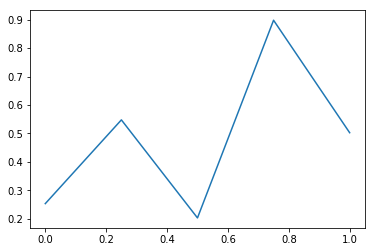

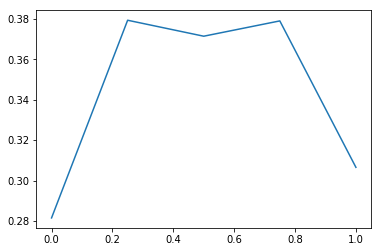

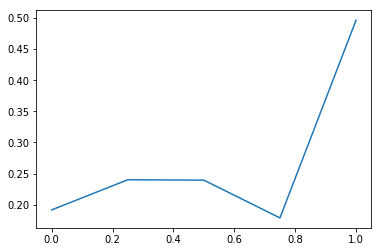

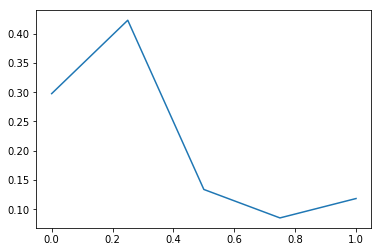

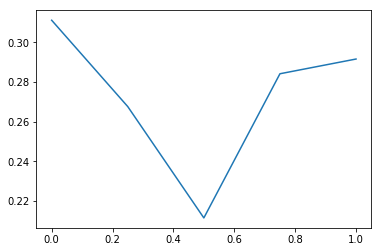

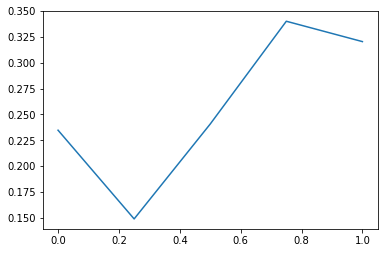

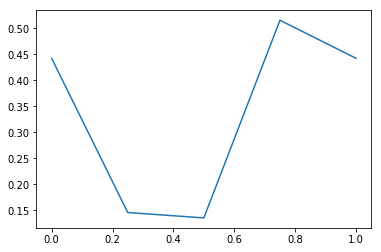

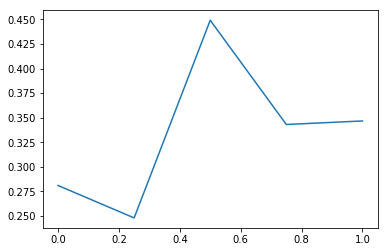

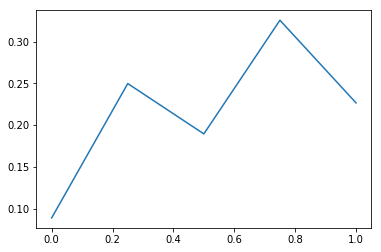

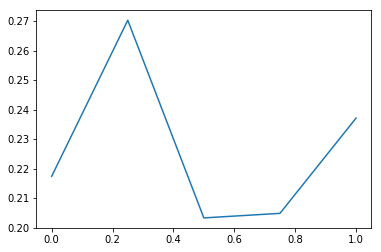

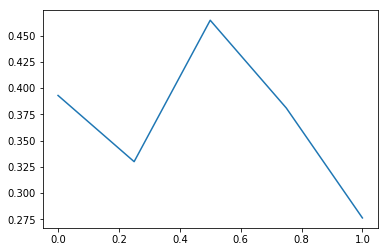

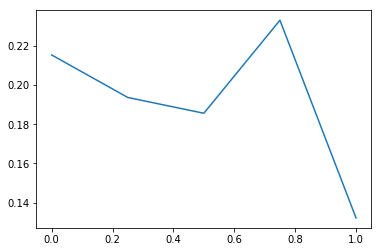

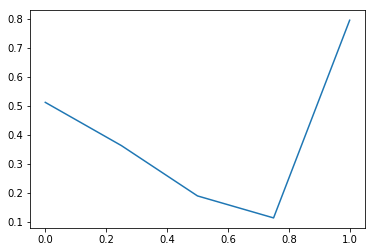

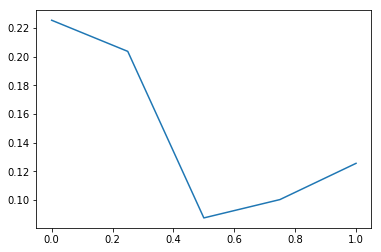

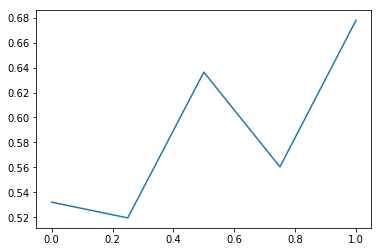

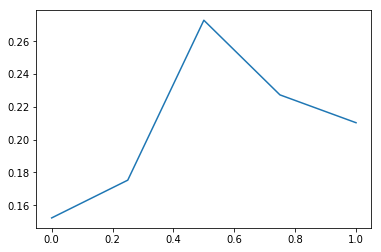

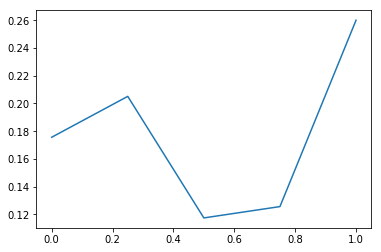

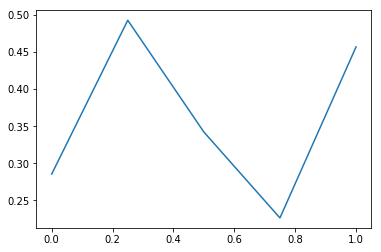

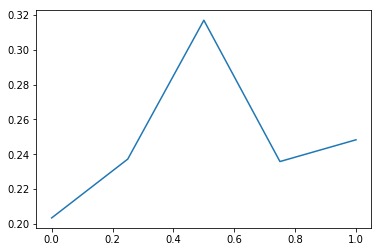

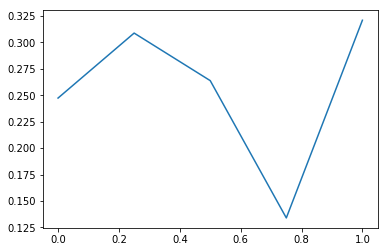

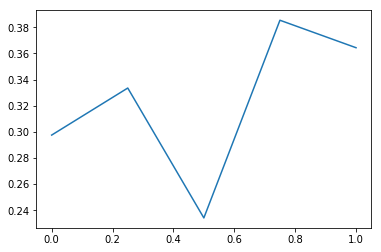

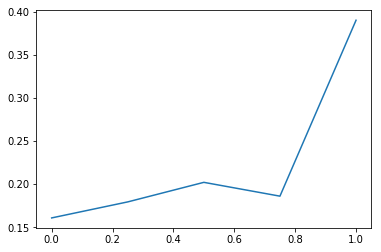

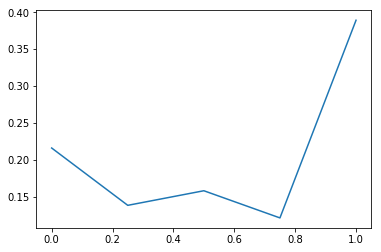

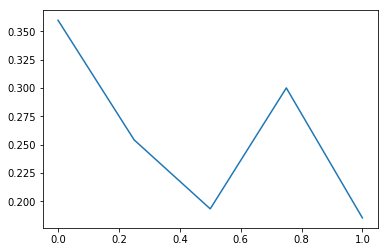

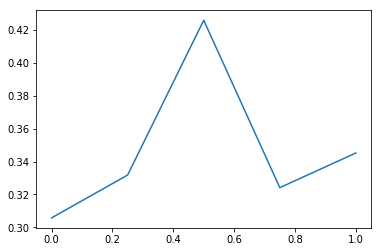

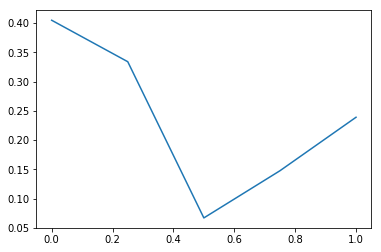

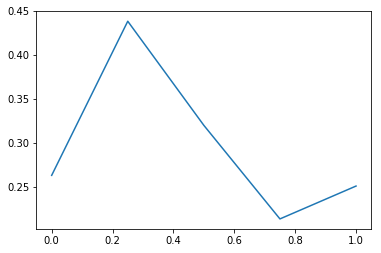

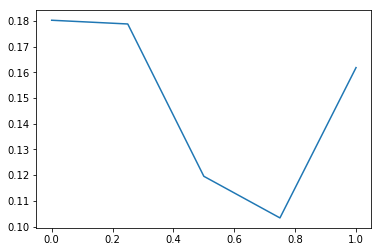

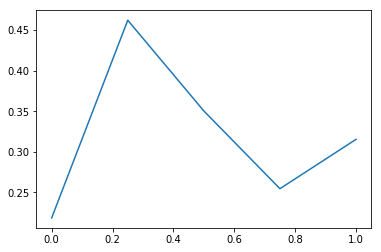

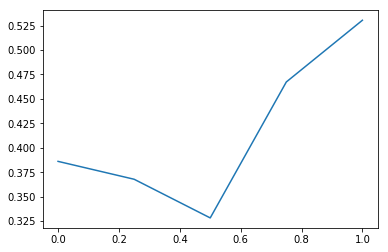

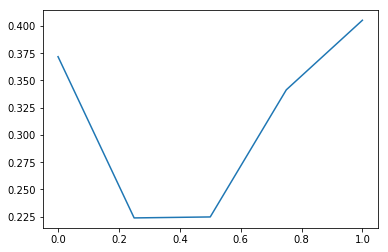

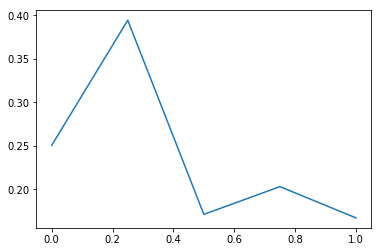

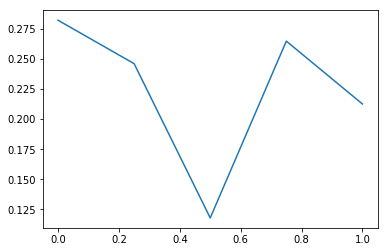

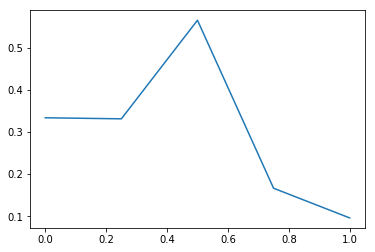

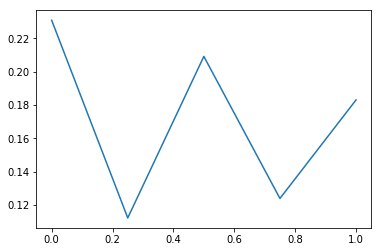

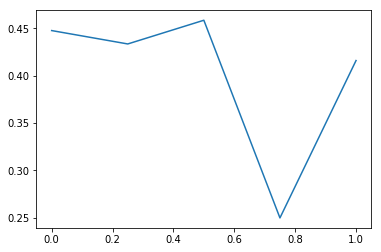

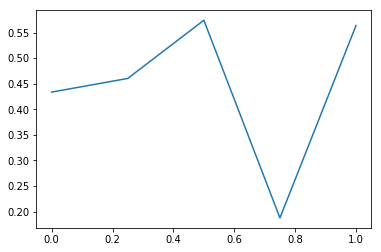

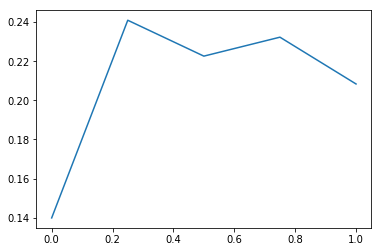

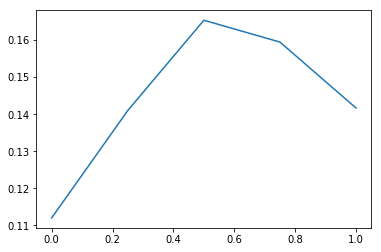

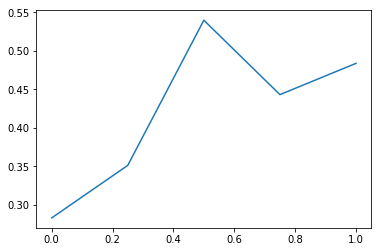

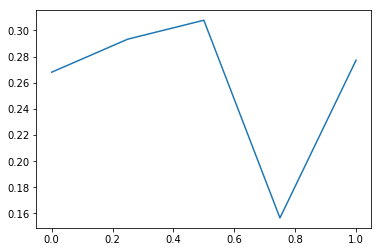

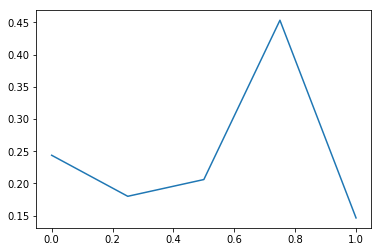

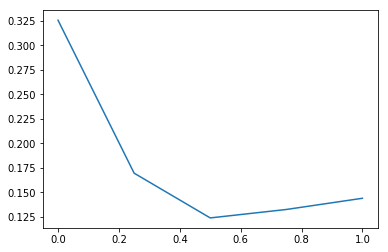

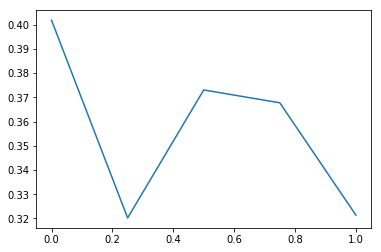

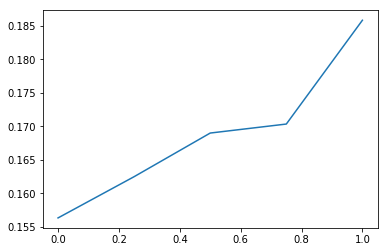

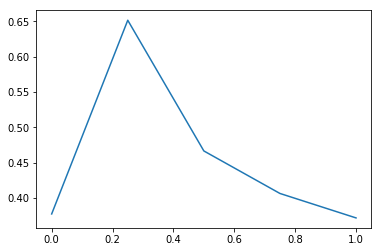

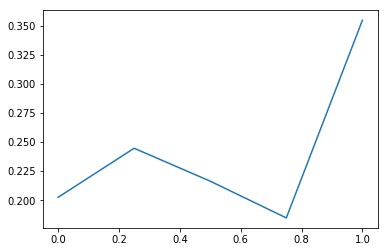

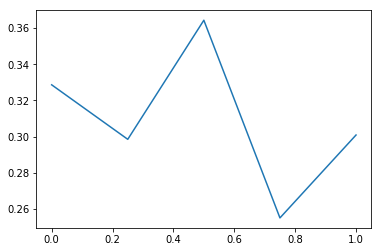

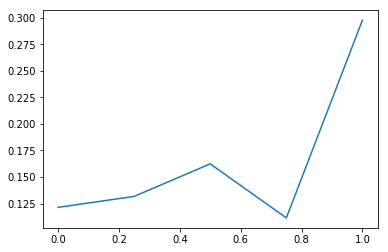

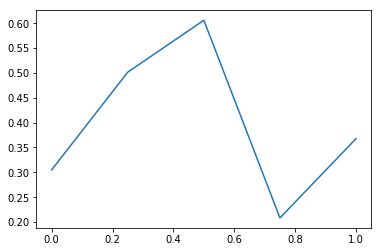

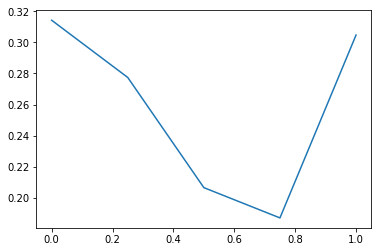

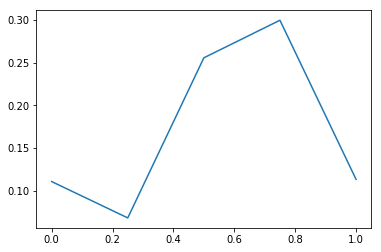

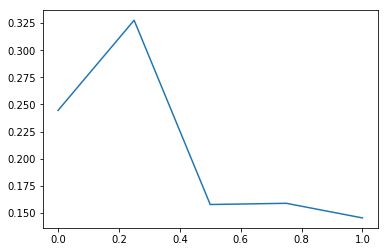

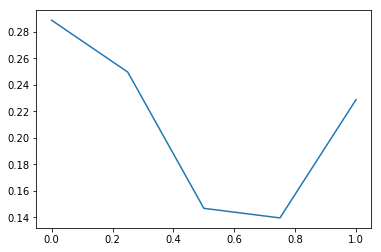

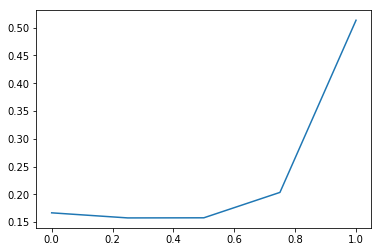

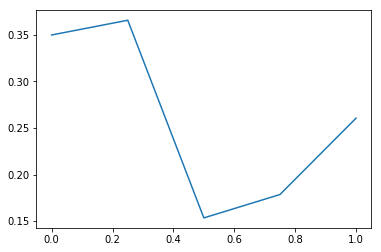

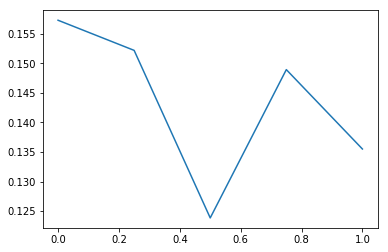

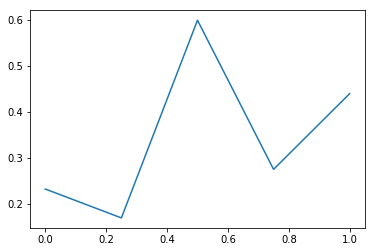

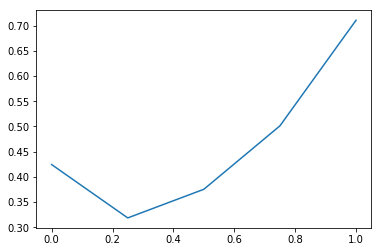

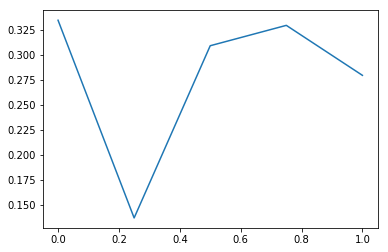

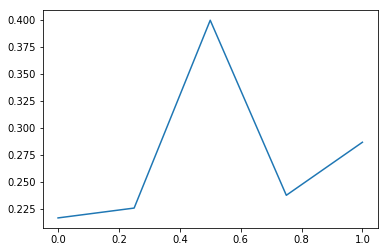

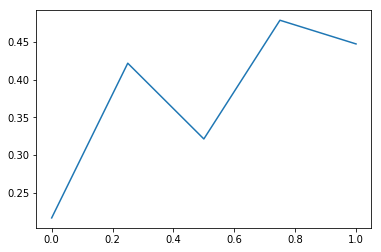

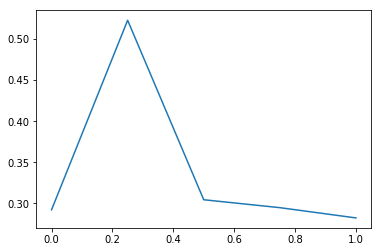

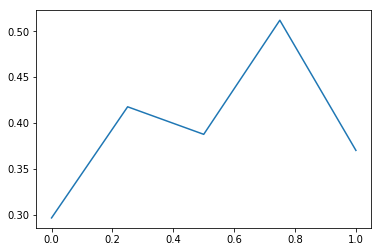

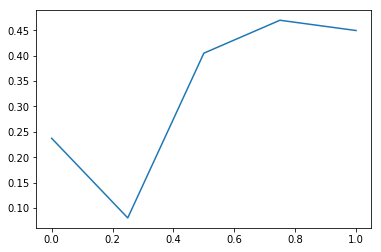

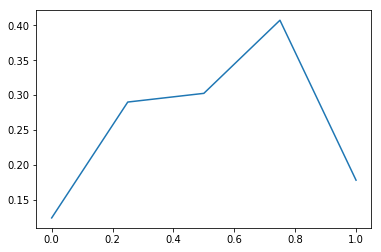

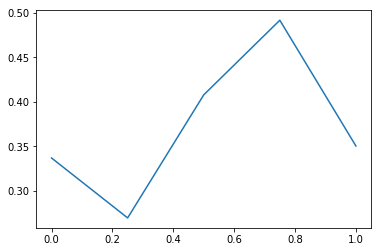

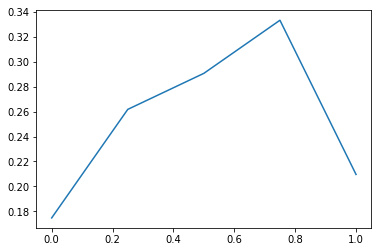

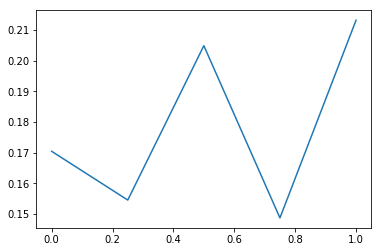

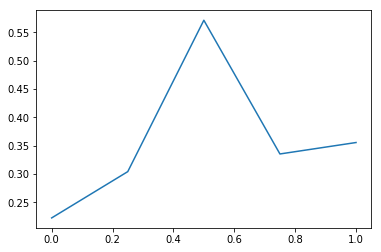

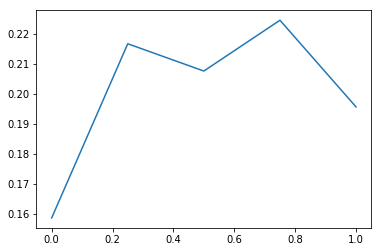

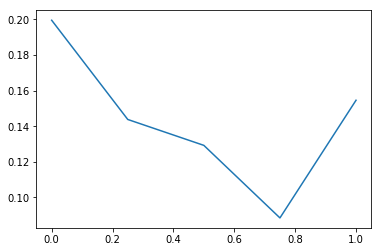

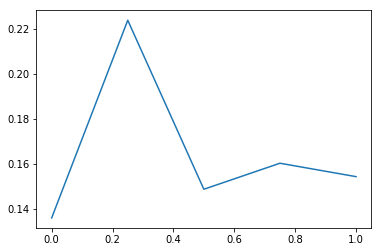

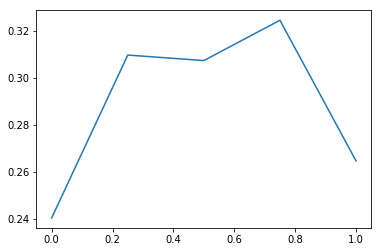

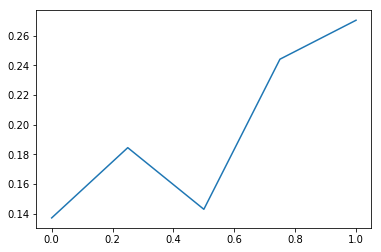

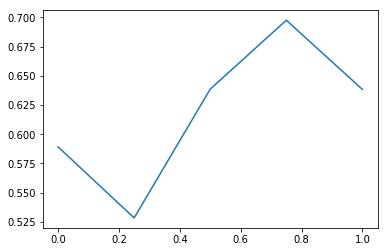

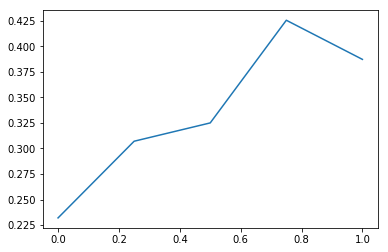

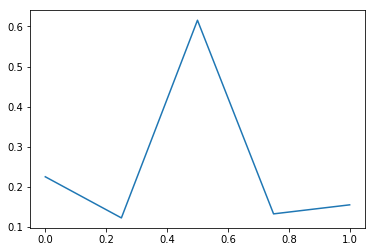

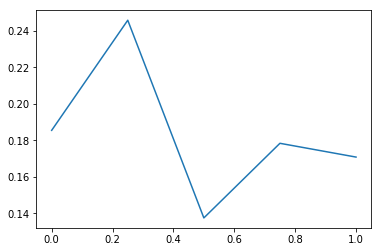

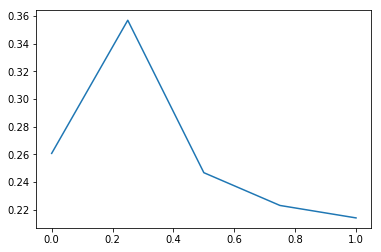

In [84]:
C = sp.stats.zscore(C,axis=0)
# S[S>0] = 1
CC = np.zeros(C.shape)
CC[C>3]=1
edges = np.arange(.1,5,1)

for c in range(0,C.shape[1],10):
    f,ax = plt.subplots()
    fr,sem = [],[]
    for m in morphs.tolist():
        fr.append(S[inds_d[m]['all'],c].mean())
        sem.append(S[inds_d[m]['all'],c].var())
        #ffr.append(C[inds_d[m]['all'],c].sum()/inds_d[m]['all'].sum())
    fr = np.array(fr)
    sem = np.array(sem)
    ax.plot(morphs,np.divide(sem,fr))
#     ax.fill_between(morphs,fr+sem,fr-sem,alpha=.3)
#     ax.plot(morphs,sem)
    
        



In [158]:
# calculate wall morph
print(VRDat.columns)
wallMorph = trial_info['morphs']+trial_info['wallJitter']
bckgndMorph = trial_info['morphs']+trial_info['bckgndJitter']
effMorph = trial_info['morphs']+trial_info['wallJitter']+trial_info['bckgndJitter']

trialFR = np.zeros([tstart_inds.shape[0],C.shape[1]])
for i,(start,stop) in enumerate(zip(tstart_inds.tolist(),teleport_inds.tolist())):
    trialFR[i,:] = S[start:stop,:].mean(axis=0)*15.47



Index(['time', 'pos', 'dz', 'morph', 'lick', 'reward', 'tstart', 'teleport',
       'clickOn', 'towerJitter', 'wallJitter', 'bckgndJitter', 'speed',
       'lick rate', 'ca inds', 'trial number'],
      dtype='object')


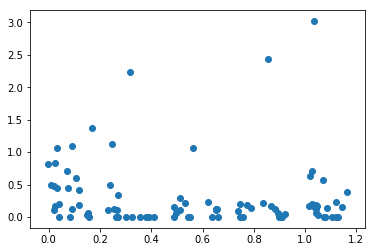

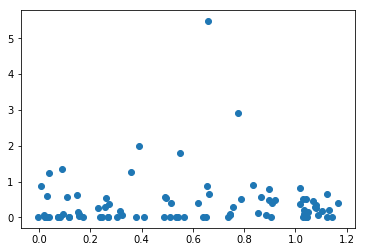

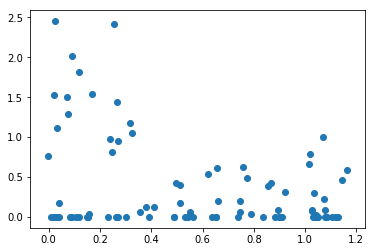

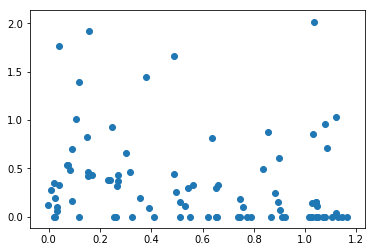

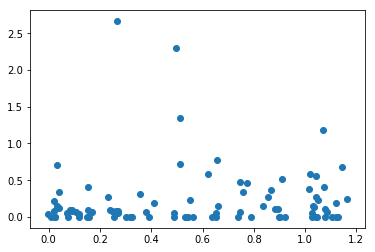

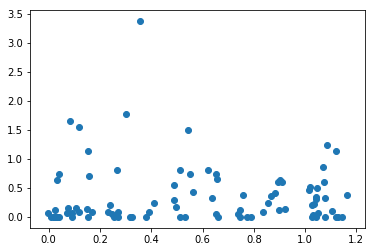

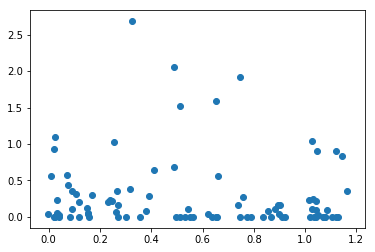

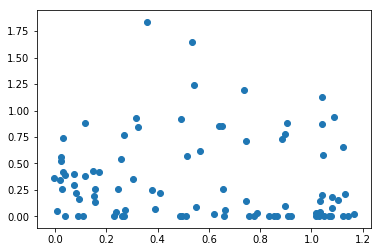

In [101]:
for c in range(0,C.shape[1],100):
    f,ax = plt.subplots()
    ax.scatter(effMorph,trialFR[:,c]*15.47)

C:\Users\mplitt\Anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


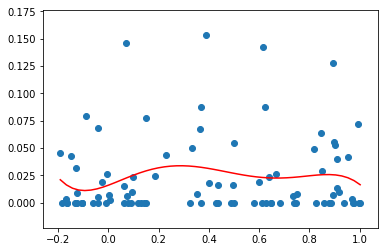

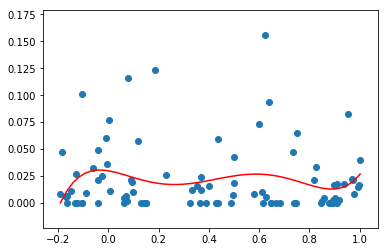

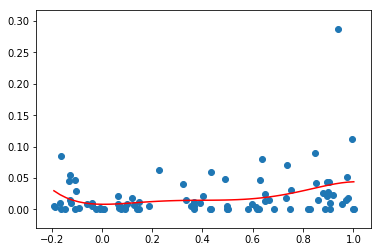

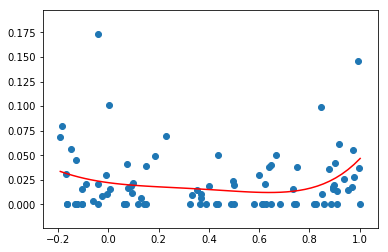

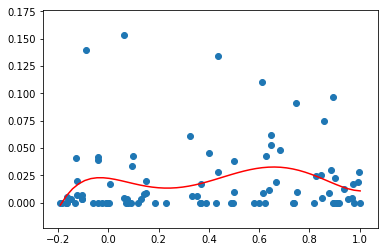

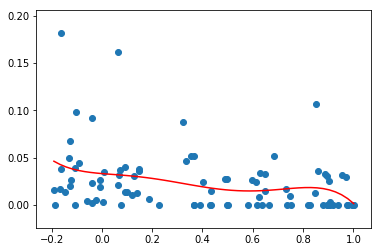

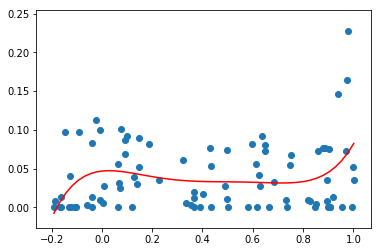

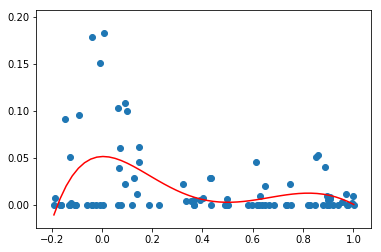

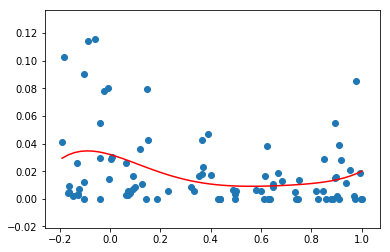

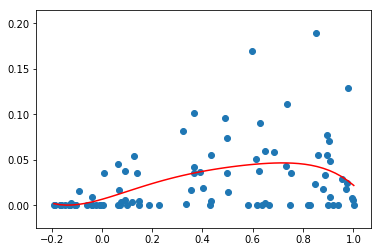

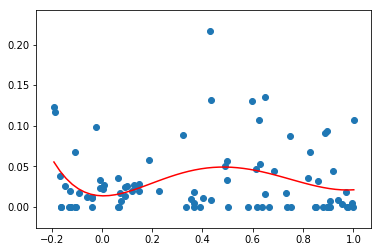

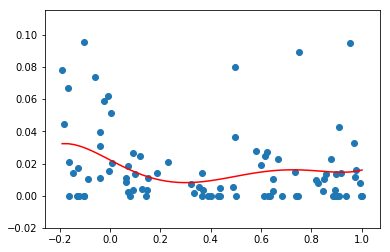

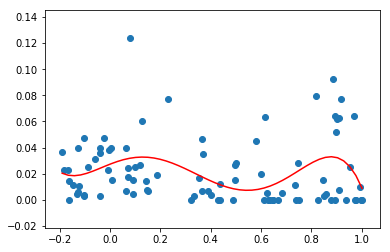

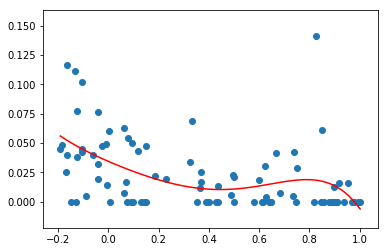

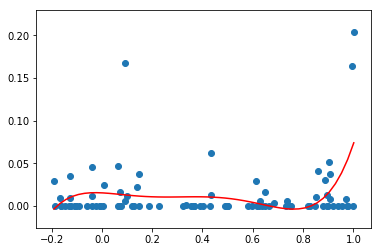

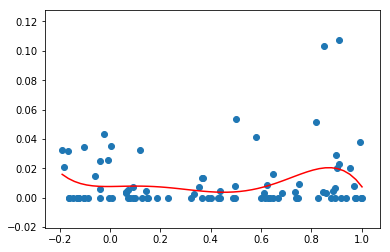

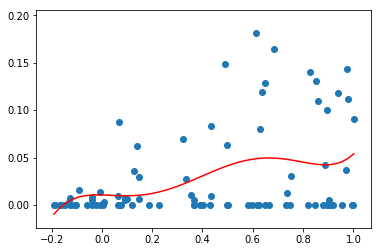

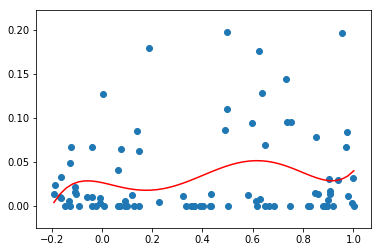

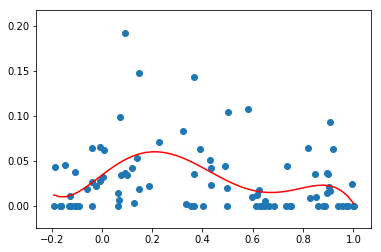

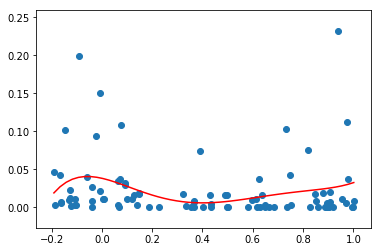

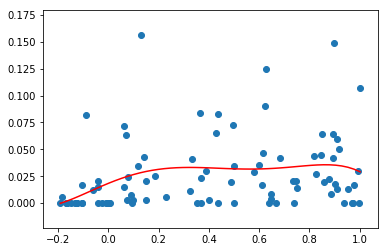

In [159]:
from sklearn import pipeline, decomposition, manifold

xx = np.linspace(np.min(effMorph),np.max(effMorph))
Y = np.zeros([C.shape[1],xx.shape[0]])
coef = np.zeros([C.shape[1],6])
for c in range(0,C.shape[1],1):
    
    model = sk.pipeline.Pipeline([('features',sk.preprocessing.PolynomialFeatures(5)),
                                  ('reg',sk.linear_model.LinearRegression())])
    model.fit(effMorph[:,np.newaxis], trialFR[:,c])

    y_plot = model.predict(xx[:, np.newaxis])
    
    Y[c,:]=y_plot
    
    
#     ########spline
#     f = sp.interpolate.interp1d(effMorph,trialFR[:,c],kind='linear')
#     y_plot = f(xx)
#     Y[c,:] = y_plot
    
    coef[c,:]=model.named_steps['reg'].coef_
    if c%50==0:
        f,ax = plt.subplots()
        ax.scatter(effMorph,trialFR[:,c])
        ax.plot(xx,y_plot,color='red')
#     ax.plot(Y[c,:,0],Y[c,:,1])

In [173]:
P,B = np.zeros([C.shape[1],]),np.zeros([C.shape[1],])
for c in range(0,C.shape[1]):
    #B[c],i,r,P[c],err=sp.stats.linregress(effMorph,trialFR[:,c])
    B[c], P[c] = sp.stats.kruskal(trialFR[trial_info['morphs']==0,c],trialFR[trial_info['morphs']==.25,c],
                                 trialFR[trial_info['morphs']==.5,c],trialFR[trial_info['morphs']==.75,c],
                                 trialFR[trial_info['morphs']==1,c])

In [23]:
print((P<.001).sum())
for p, b in zip(P.tolist(),B.tolist()):
    if p<.001:
        print(p,b)

90
0.0007051174075557808 -0.6358859559355632
5.5965612392333645e-05 -1.2090652038965812
0.000450422260396319 -0.8015035629843063
0.00019749829982104267 -0.7520738432561802
4.5844090248039887e-05 -1.1174559117419942
0.0009571358383949607 0.9373091377357908
0.000388819170811242 0.9760368710926816
6.056283181294867e-05 -1.112781334355975
0.0007613762937081269 0.9080597211960659
2.0257653454738007e-06 -1.3814042386303629
0.0008791125161447154 1.0188425860810777
0.00021419576905435774 -0.7229140034612846
0.0002543102786237206 0.7571710792562516
0.0004552827109566576 0.9780841697551176
0.0005775519871979045 0.8974857622062572
0.0003169279854953823 1.131669046005241
6.596259854155188e-05 -1.2251775423319171
0.00045580561582417626 -0.8851891894764216
0.000628956005156369 1.1723054424065615
0.0007470180871576191 -0.7698786964212857
0.0003367156160680974 0.7640708616772393
0.000343162288543778 -0.6911483830355781
0.0002103224560890989 -0.3973366869830442
0.0008512429911894832 0.8895602593963631


In [174]:
# FDR 
sort = np.argsort(P)
P,B = P[sort], B[sort]
Y = Y[sort,:]
k = 0
while P[k]<= (k+1)/C.shape[1]*.01:
    k+=1
print(k)

144


(array([  4.,   7.,  10.,  29.,  96., 219., 377., 191.,  56.,   6.]),
 array([-0.09908488, -0.08323466, -0.06738445, -0.05153423, -0.03568401,
        -0.01983379, -0.00398358,  0.01186664,  0.02771686,  0.04356707,
         0.05941729]),
 <a list of 10 Patch objects>)

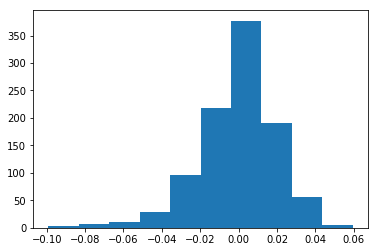

In [61]:
f,ax = plt.subplots()
ax.hist(B[:])

In [162]:
pca = sk.decomposition.PCA()
Y_pca = pca.fit_transform(Y[:,:])

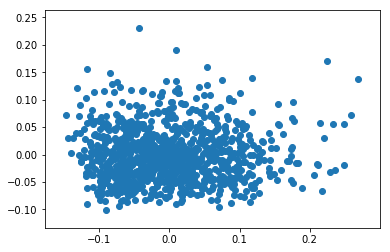

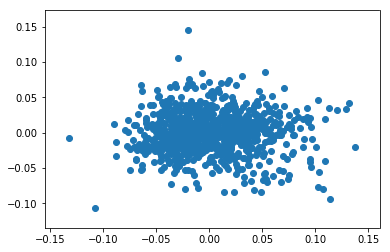

In [163]:
f,ax = plt.subplots()
ax.scatter(Y_pca[:,0],Y_pca[:,1])#,c=coef[:k,-1])
f,ax = plt.subplots()
ax.scatter(Y_pca[:,2],Y_pca[:,3])#,c=coef[:k,1])

1.0


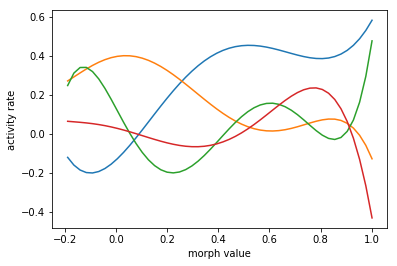

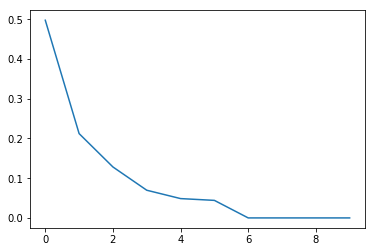

In [164]:
f,ax = plt.subplots()
ax.plot(xx,pca.singular_values_[0]*pca.components_[0,:] +pca.mean_)
ax.plot(xx,pca.singular_values_[1]*pca.components_[1,:]+pca.mean_)
ax.plot(xx,pca.singular_values_[2]*pca.components_[2,:]+pca.mean_)
ax.plot(xx,pca.singular_values_[3]*pca.components_[3,:]+pca.mean_)
ax.set_xlabel('morph value')
ax.set_ylabel('activity rate')


f,ax = plt.subplots()
ax.plot(pca.explained_variance_ratio_[:10])
print(pca.explained_variance_ratio_.sum())



In [192]:
def make_spline_basis(x,knots=np.arange(-.2,1,.34)):
    '''make cubic spline basis functions'''
    knotfunc = lambda k: np.power(np.multiply(x-k,(x-k)>0),3)
    spline_basis_list = [knotfunc(k) for k in knots.tolist()]
    spline_basis_list += [np.ones(x.shape[0]),x,np.power(x,2)]
    return np.array(spline_basis_list).T

C:\Users\mplitt\Anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


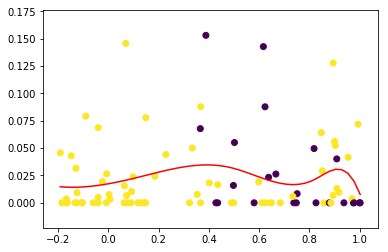

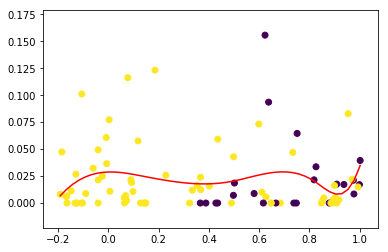

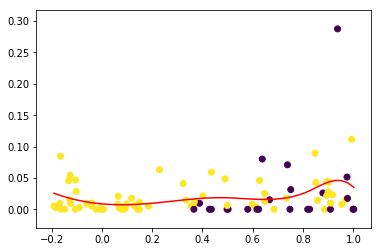

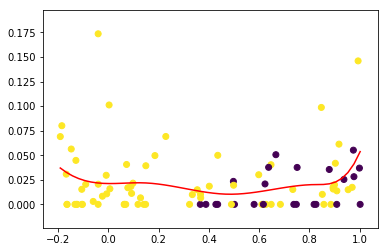

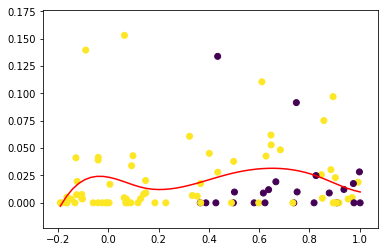

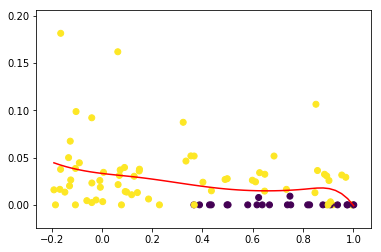

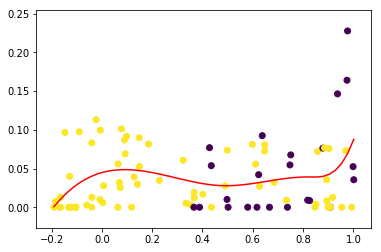

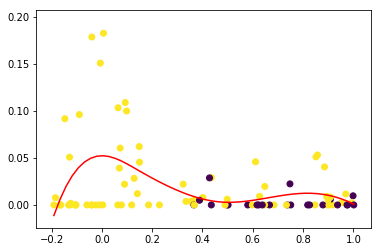

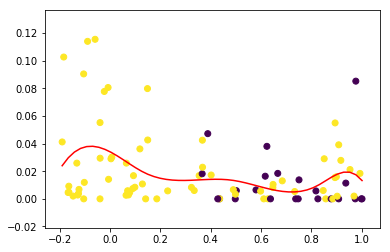

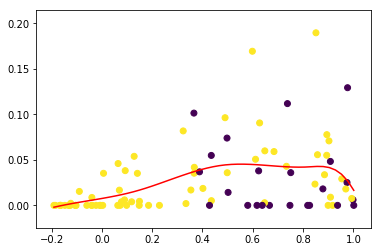

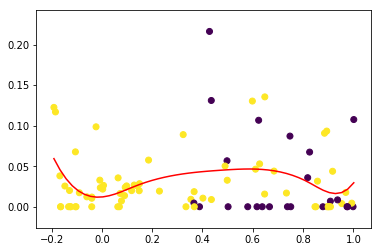

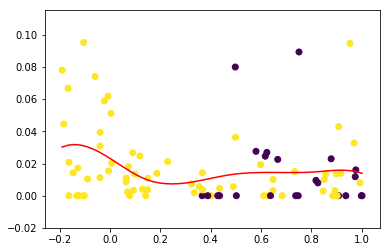

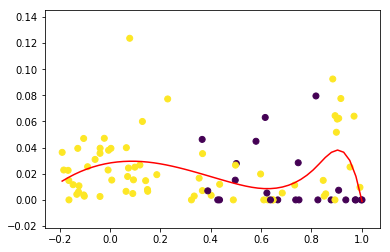

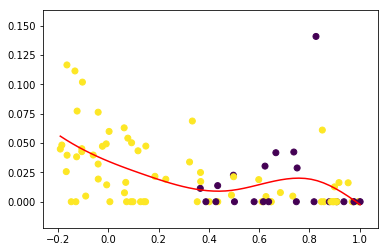

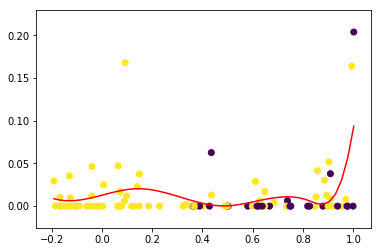

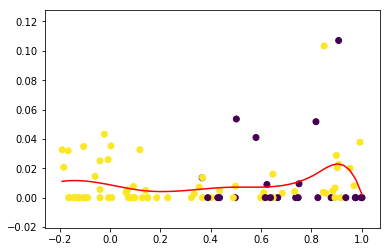

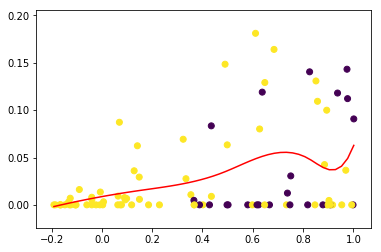

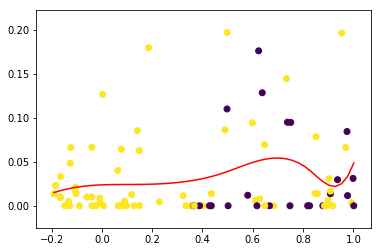

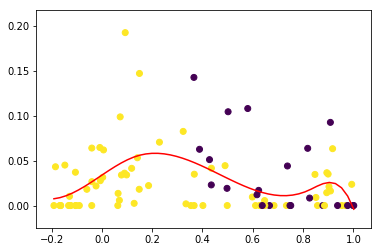

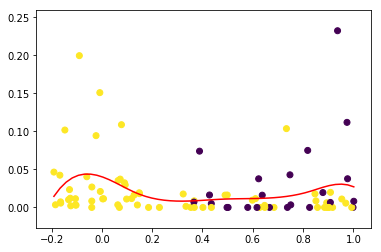

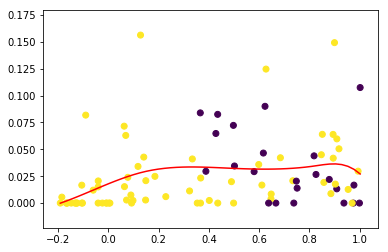

In [197]:
basis = make_spline_basis(effMorph)
xx = np.linspace(np.min(effMorph),np.max(effMorph))
xx_basis = make_spline_basis(xx)
Yspl = np.zeros([C.shape[1],xx.shape[0]])

for c in range(0,C.shape[1],1):
    
    model = sk.linear_model.LinearRegression()
    model.fit(basis, trialFR[:,c])

    y_plot = model.predict(xx_basis)
    
    Yspl[c,:]=y_plot
    if c%50==0:
        f,ax = plt.subplots()
        ax.scatter(effMorph,trialFR[:,c],c=trial_info['rewards'])
        ax.plot(xx,y_plot,color='red')

In [194]:
# FDR 
sort = np.argsort(P)
P,B = P[sort], B[sort]
Yspl = Yspl[sort,:]
k = 0
while P[k]<= (k+1)/C.shape[1]*.05:
    k+=1
print(k)

293


1.0


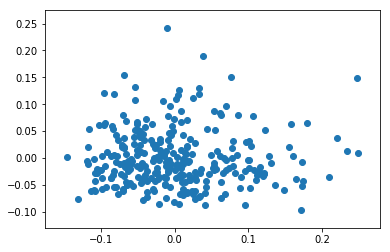

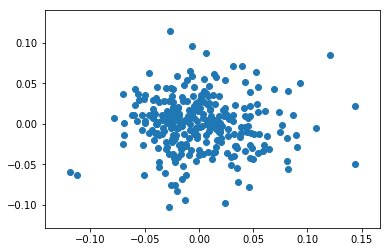

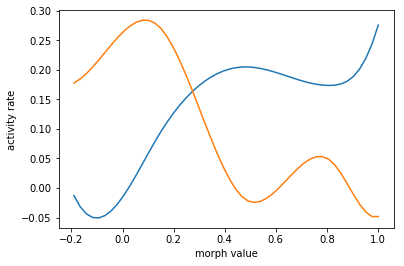

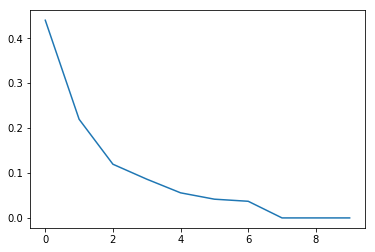

In [196]:
pca = sk.decomposition.PCA()
Y_pca = pca.fit_transform(Yspl[:k+1,:])
f,ax = plt.subplots()
ax.scatter(Y_pca[:,0],Y_pca[:,1])
f,ax = plt.subplots()
ax.scatter(Y_pca[:,2],Y_pca[:,3])
f,ax = plt.subplots()
ax.plot(xx,pca.components_[0,:] +pca.mean_)
ax.plot(xx,pca.components_[1,:]+pca.mean_)
# ax.plot(xx,pca.components_[2,:]+pca.mean_)
# ax.plot(xx,pca.components_[3,:]+pca.mean_)
# ax.plot(xx,pca.components_[4,:]+pca.mean_)
# ax.plot(xx,pca.components_[5,:]+pca.mean_)
ax.set_xlabel('morph value')
ax.set_ylabel('activity rate')


f,ax = plt.subplots()
ax.plot(pca.explained_variance_ratio_[:10])
print(pca.explained_variance_ratio_.sum())


In [51]:
lda = sk.lda.LDA()


AttributeError: module 'sklearn' has no attribute 'lda'

In [ ]:
H = np.zeros([C.shape[1],])
P = np.zeros([C.shape])